# Motivation

The canonical Black-Scholes option pricing formula assumes that price changes follow a lognormal distribution. However, this distribution underestimates the likelihood of large price movements (shown in below plot). To account for this, options markets typically have a 'volatility smile' whereby the implied volatility of further from the money options is larger than that of ATM options. This project prices BTC options using a 'fatter tailed distribution' than the lognormal distribution in the hope that widespread use of Black Scholes option prices may lead to inefficiencies (especially in volatile markets such as BTC).

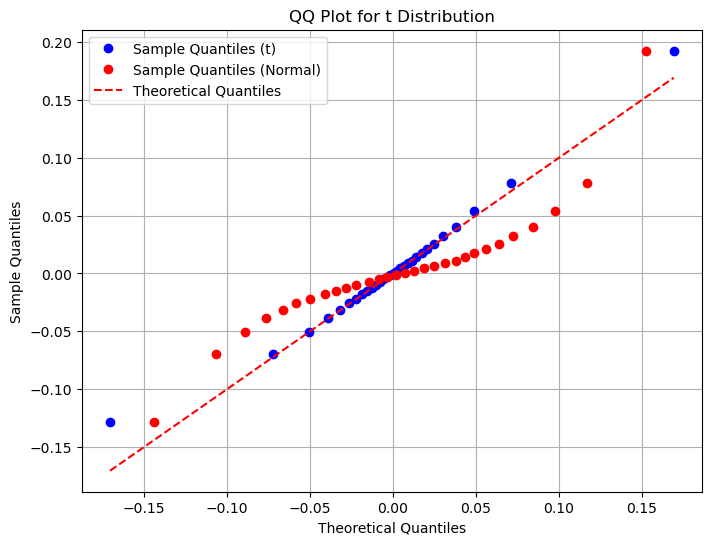

In [14]:
# Poor fit of normal distribution to historical daily BTC price movements compared to t distribution shown by QQ plot (closer to dotted red line implies better fit)
import pandas as pd
from Trading_Python_Functions import fit

df = pd.read_csv('Data/Daily BTC Prices.csv')
fit(df)

#
#
#
#
#
#
#
#
#
#
# Data

6 years of Deribit BTC option ask price data from the start of each month was scraped from Tardis data providers. 'profit' was calculated for each option assuming it was held until expiry.

In [15]:
from Trading_Python_Functions import fit

df = pd.read_csv('Data/BTC_Tardis.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df[['symbol', 'date', 'option_price', 'profit']]

,symbol,date,option_price,profit
0,BTC-12APR19-3375-P,2019-03-31,4.094320,-4.094320
23,BTC-5APR19-4000-P,2019-03-31,40.943200,-40.943200
24,BTC-5APR19-4125-C,2019-03-31,61.414800,757.915200
25,BTC-26APR19-3500-P,2019-03-31,28.660240,-28.660240
26,BTC-5APR19-3875-P,2019-03-31,14.330120,-14.330120
...,...,...,...,...
17839,BTC-19JUL24-58000-C,2024-07-01,5839.839500,-145.829500
17838,BTC-2JUL24-57000-P,2024-07-01,12.545099,-12.545099
17837,BTC-12JUL24-60000-C,2024-07-01,3748.476795,-3748.476795
17835,BTC-12JUL24-50000-P,2024-07-01,31.503480,-31.503480


#
#
#
#
#
#
#
#
#
#
# Strategy
1. Fit a t-distribution to the price changes of BTC over various time intervals in a training dataset.
2. Price each option in test dataset using belolw formula with $P_i$ being the probability of BTC reaching i-th possible Payoff. $P_i$ is determined by accessing the t-distribution for the time interval corresponding to option's time until expiry.

$$
\text{watson\_price} = \sum_{i=0}^{n} P_i \cdot \text{Payoff}_i
$$

3. Simulate test dataset trades when market prices diverge from the model's theoretical prices. 
4. Actual payoffs for these traded options can be calculated assuming they were held until expiry. 
5. The same process can be carried out using Black-Scholes prices.
6. The performance of the proposed option pricing model is compared to Black-Scholes in the PnL over time plots below.

In [16]:
df[['symbol', 'date', 'option_price','watson_price','bs_price', 'profit']]

,symbol,date,option_price,watson_price,bs_price,profit
0,BTC-12APR19-3375-P,2019-03-31,4.094320,14.467850,7.751128,-4.094320
23,BTC-5APR19-4000-P,2019-03-31,40.943200,59.094551,72.553893,-40.943200
24,BTC-5APR19-4125-C,2019-03-31,61.414800,81.346823,100.601715,757.915200
25,BTC-26APR19-3500-P,2019-03-31,28.660240,87.335991,61.925213,-28.660240
26,BTC-5APR19-3875-P,2019-03-31,14.330120,28.239487,34.701367,-14.330120
...,...,...,...,...,...,...
17839,BTC-19JUL24-58000-C,2024-07-01,5839.839500,6277.667366,6562.115451,-145.829500
17838,BTC-2JUL24-57000-P,2024-07-01,12.545099,21.063003,5.396739,-12.545099
17837,BTC-12JUL24-60000-C,2024-07-01,3748.476795,4081.307338,4429.307511,-3748.476795
17835,BTC-12JUL24-50000-P,2024-07-01,31.503480,110.500940,36.562214,-31.503480


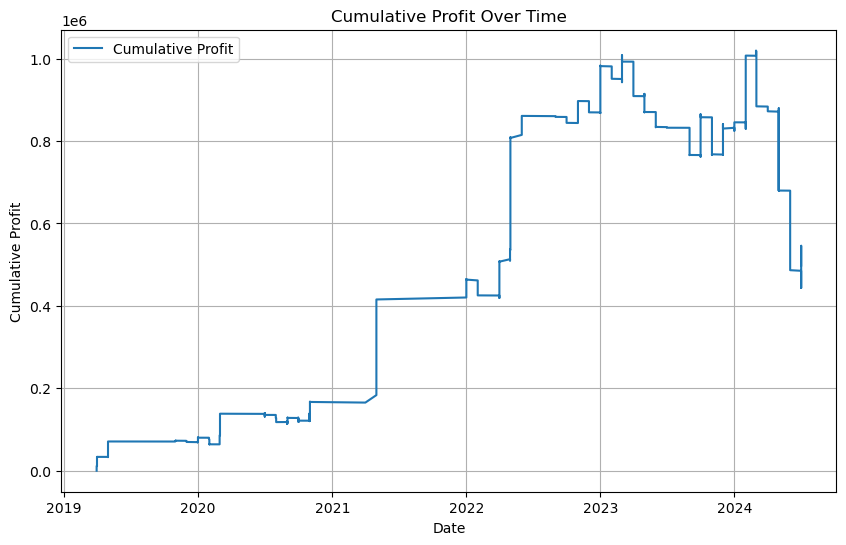

In [ ]:
from Trading_Python_Functions import trading_sim_options
import warnings
warnings.filterwarnings("ignore")


trading_sim_options(df, 'watson_price', 0) 

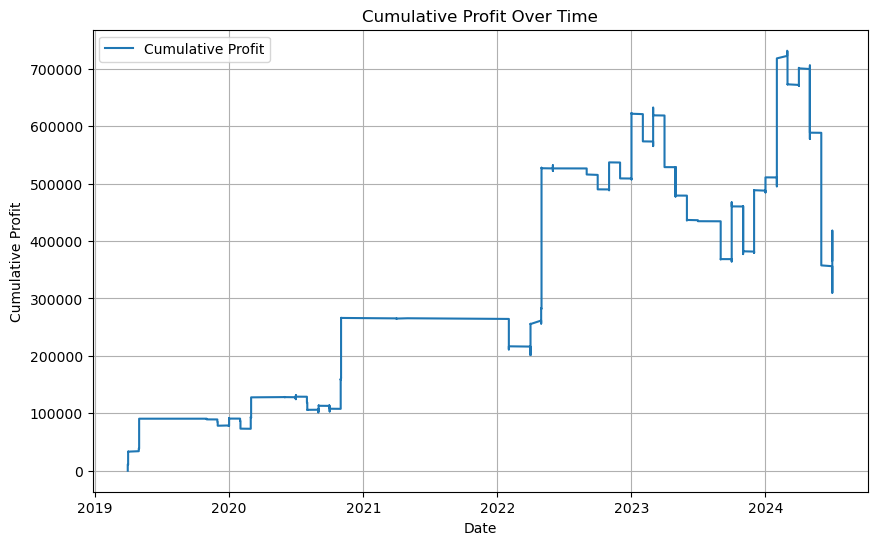

In [18]:
trading_sim(df, 'bs_price', 0) 

#
#
#
#
#
#
#
#
#
#
# Results

The alternative option pricing algorithm outperforms Black-Scholes over the test period. This suggests it has capitalised on the possibility of large BTC price movements as hoped. Obviously, these backtests suffer from BTC survivorship bias which boosts PnL.